### LEAD SCORING CASE STUDY

In [1329]:
import pandas as pd
import numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1330]:
# Reading Dataset
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Removing Null Values

In [1332]:
# Percentage of null values in a column 
df_null = (df.isnull().sum()/len(df))*100
del_cols= df_null[df_null>29].index
del_cols

Index(['What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [1333]:
#drop columns having more than 29% of null values 
df_lead = df.drop(del_cols,axis=1)
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9204 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9103 non-null float64
Last Activity                               9137 non-null object
Country                                     6779 non-null object
Specialization                              7802 non-null object
How did you hear about X Education          7033 

In [1334]:
# Check if there are any duplicates in the following columns
print(any(df_lead['Prospect ID'].duplicated()))
print(any(df_lead['Lead Number'].duplicated()))

False
False


In [1335]:
#Percentage of null values
df_null = (df_lead.isnull().sum()/len(df_lead))*100
df_null

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Country                                     26.634199
Specialization                              15.562771
How did you hear about X Education          23.885281
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

In [1336]:
df_lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Germany                    4
Nigeria                    4
Canada                     4
Sweden                     3
Netherlands                2
Italy                      2
Bangladesh                 2
Ghana                      2
Uganda                     2
Belgium                    2
Asia/Pacific Region        2
China                      2
Philippines                2
Malaysia                   1
Denmark                    1
Kenya                      1
Indonesia                  1
Russia                     1
Liberia                    1
Switzerland   

In [1337]:
df_lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [1338]:
df_lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1339]:
df_lead[['How did you hear about X Education','Specialization','City']] = df_lead[['How did you hear about X Education','Specialization','City']].replace({'Select':np.nan})

In [1340]:
df_lead[['How did you hear about X Education','Specialization','City']].head()

,How did you hear about X Education,Specialization,City
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,Business Administration,Mumbai
3,Word Of Mouth,Media and Advertising,Mumbai
4,Other,NaN,Mumbai


In [1341]:
#After formatting check for null values again
df_null = (df_lead.isnull().sum()/len(df_lead))*100
df_null

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Country                                     26.634199
Specialization                              36.580087
How did you hear about X Education          78.463203
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

In [1342]:
# Drop columns
df_lead.drop(['Country','How did you hear about X Education','Specialization','City'],axis=1,inplace=True)

###### Most of the values in country column is India. There are about 26% of values as Null. So  removed the column. The column specialization and  'How did you hear about X Education' have invalid value 'select'. Replaced it with null value and removed the columns after checking percentage of null values again.

In [1343]:
df_null = (df_lead.isnull().sum()/len(df_lead))*100
df_null

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

###### Most of the null values are removed. Lets remove the rows with null values.

In [1344]:
#Extract rows with out any null values
df_lead=df_lead[df_lead.isnull().any(axis=1) == False]

In [1345]:
df_null = (df_lead.isnull().sum()/len(df_lead))*100
df_null

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [1346]:
df_lead.shape

(9074, 24)

In [1347]:
df_lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
testone                 1
Pay per Click Ads       1
blog                    1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [1348]:
df_lead['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [1349]:
df_lead['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [1350]:
# The above two columns have same values for most of the rows. There is no much variance in the data. So removed the columns
df_lead.drop(['Do Not Call','Search'],axis=1,inplace=True)

In [1351]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 non-null object
X Education Forums                          9074 non-null object
Newspaper                                   9074 

In [1352]:
df_lead['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [1353]:
df_lead['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [1354]:
df_lead['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [1355]:
df_lead['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [1356]:
df_lead['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [1357]:
df_lead['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [1358]:
df_lead['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

##### The above two columns have same values for most of the rows. There is no much variance in the data. So removed the columns

In [1359]:
df_lead.drop(['Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'],axis=1,inplace=True)

In [1360]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Update me on Supply Chain Content           9074 non-null object
Get updates on DM Content                   9074 non-null object
I agree to pay the amount through cheque    9074 non-null object
A free copy of Mastering The Interview      9074 

In [1361]:
df_lead['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [1362]:
df_lead['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [1363]:
df_lead['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [1364]:
df_lead['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [1365]:
df_lead.drop(['I agree to pay the amount through cheque'],axis=1,inplace=True)

In [1366]:
df_lead.shape

(9074, 14)

In [1367]:
df_lead['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Email Received                     1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [1368]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Update me on Supply Chain Content         9074 non-null object
Get updates on DM Content                 9074 non-null object
A free copy of Mastering The Interview    9074 non-null object
Last Notable Activity                     9074 non-null object
dtypes: floa

In [1369]:
df_lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1370]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,Modified


### Data Preparation
#### Converting some binary variables (Yes/No) to 0/1

In [1371]:
varlist = ['Do Not Email','Update me on Supply Chain Content','Get updates on DM Content','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_lead[varlist] = df_lead[varlist].apply(binary_map)

In [1372]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded) and removed the column with very less data so that ressult looks good

In [1373]:
df_lead['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [1374]:
# Creating a dummy variable for some of the categorical variables and dropping one variable.
dummy1 = pd.get_dummies(df_lead['Lead Origin'],prefix='LeadOrigin')
dummy1=dummy1.drop('LeadOrigin_Lead Import',axis=1)
df_lead = pd.concat([df_lead, dummy1], axis=1)

In [1375]:
# Creating a dummy variable for some of the categorical variables and dropping one variable.
df_lead.replace({'Lead Source':{'google':'Google'}})
dummy2 = pd.get_dummies(df_lead['Lead Source'],prefix='LeadSource')
dummy2=dummy2.drop('LeadSource_welearnblog_Home',axis=1)
df_lead = pd.concat([df_lead, dummy2], axis=1)

In [1376]:
# Creating a dummy variable for some of the categorical variables and dropping one variable.
dummy3 = pd.get_dummies(df_lead['Last Activity'],prefix='LastActivity')
dummy3=dummy3.drop('LastActivity_Visited Booth in Tradeshow',axis=1)
df_lead = pd.concat([df_lead, dummy3], axis=1)

In [1377]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy4 = pd.get_dummies(df_lead['Last Notable Activity'],prefix='LastNotableActivity')
dummy4=dummy4.drop('LastNotableActivity_Approached upfront',axis=1)
df_lead = pd.concat([df_lead, dummy4], axis=1)

In [1378]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [1379]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
df_lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'],axis=1,inplace=True)

In [1380]:
df_lead.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1381]:
df_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Do Not Email                                        0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
A free copy of Mastering The Interview              0
LeadOrigin_API                                      0
LeadOrigin_Landing Page Submission                  0
LeadOrigin_Lead Add Form                            0
LeadSource_Click2call                               0
LeadSource_Direct Traffic                           0
LeadSource_Facebook                                 0
LeadSource_Google                                   0
LeadSource_Live Chat                                0
LeadSource_NC_EDM           

In [1382]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


##### The maximum values are very far from the values at 99% quartile. So romoved outliers by considering data from 5% to 98%

In [1383]:
Q1 = df_lead.TotalVisits.quantile(0.05)
Q3 = df_lead.TotalVisits.quantile(0.98)
df_lead = df_lead[(df_lead.TotalVisits >= Q1) & (df_lead.TotalVisits <= Q3)]

In [1384]:
df_lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8900.000000,8900.000000,8900.000000
mean,3.094719,477.797416,2.310474
std,2.745061,543.539000,1.992907
min,0.000000,0.000000,0.000000
25%,1.000000,6.750000,1.000000
50%,3.000000,241.000000,2.000000
75%,5.000000,908.000000,3.000000
90%,7.000000,1369.100000,5.000000
95%,9.000000,1552.000000,6.000000
99%,12.000000,1837.020000,9.000000


### TEST - TRAIN SPLIT

In [1385]:
from sklearn.model_selection import train_test_split

In [1386]:
# Putting feature variable to X
X = df_lead.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [1387]:
y=df_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1388]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1389]:
from sklearn.preprocessing import StandardScaler

In [1390]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2912,0,-1.126650,-0.888299,-1.160478,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4316,0,2.148169,-0.016361,0.342181,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1812,0,2.512038,0.991131,3.848386,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7643,1,-0.762781,-0.468816,-0.659592,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4456,0,-0.398912,0.833596,-0.659592,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1391]:
### Checking the Lead Rate
lead = (sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100
lead

37.741573033707866

### Model Building

In [1392]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1393]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1394]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True,  True, False, False, False, False, False])

In [1395]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Update me on Supply Chain Content', False, 47),
 ('Get updates on DM Content', False, 46),
 ('A free copy of Mastering The Interview', False, 43),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadSource_Click2call', False, 12),
 ('LeadSource_Direct Traffic', False, 25),
 ('LeadSource_Facebook', False, 40),
 ('LeadSource_Google', False, 30),
 ('LeadSource_Live Chat', False, 36),
 ('LeadSource_NC_EDM', False, 10),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 29),
 ('LeadSource_Pay per Click Ads', False, 34),
 ('LeadSource_Press_Release', False, 42),
 ('LeadSource_Reference', False, 5),
 ('LeadSource_Referral Sites', False, 35),
 ('LeadSource_Social Media', False, 39),
 ('LeadSource_WeLearn', False, 20),
 ('LeadSource_Welingak Website', True, 1

In [1396]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')

In [1397]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'A free copy of Mastering The Interview', 'LeadSource_Click2call',
       'LeadSource_Direct Traffic', 'LeadSource_Facebook', 'LeadSource_Google',
       'LeadSource_Live Chat', 'LeadSource_NC_EDM',
       'LeadSource_Organic Search', 'LeadSource_Pay per Click Ads',
       'LeadSource_Press_Release', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_bing', 'LeadSource_blog',
       'LeadSource_google', 'LeadSource_testone', 'LeadSource_youtubechannel',
       'LastActivity_Approached upfront', 'LastActivity_Converted to Lead',
       'LastActivity_Email Link Clicked', 'LastActivity_Email Marked Spam',
       'LastActivity_Email Opened', 'LastActivity_Email Received',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website',
       'LastActivity_Res

### Assesing Model

In [1398]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6214
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.1
Date:                Mon, 10 Jun 2019   Deviance:                       5536.2
Time:                        23:14:53   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           1.4603      0.494      2.955      0.003       0.492       2.429
Do Not Email                                   -1.5767      0.204     -7.743      0.000      -1.976      -1.178
Total Time Spent on Website                     1.1503      0.040     28.973      0.000       1.072       1.228
LeadOrigin_API                                 -1.0782      0.496     -2.176      0.030      -2.050      -0.107
LeadOrigin_Landing Page Submission             -1.2225      0.492     -2.484      0.013      -2.187      -0.258
LeadOrigin_Lead Add Form                        3.1684      0.534      5.937      0.000       2.122       4.214
LeadSource_Olark Chat                           1.1370      0.117      9.682      0.000       0.907       1.367
LeadSource_Welingak Website                     2.2692      1.038      2.187      0.029       0.235       4.303
LastActivity_Email Bounced                     -1.5928      0.473     -3.365      0.001      -2.521      -0.665
LastActivity_Had a Phone Conversation           1.4794      0.641      2.306      0.021       0.222       2.737
LastActivity_Olark Chat Conversation           -1.4026      0.190     -7.392      0.000      -1.774      -1.031
LastNotableActivity_Email Link Clicked         -2.0074      0.262     -7.669      0.000      -2.520      -1.494
LastNotableActivity_Email Opened               -1.3967      0.086    -16.326      0.000      -1.564      -1.229
LastNotableActivity_Modified                   -1.7568      0.094    -18.714      0.000      -1.941      -1.573
LastNotableActivity_Olark Chat Conversation    -1.6667      0.369     -4.512      0.000      -2.391      -0.943
LastNotableActivity_Page Visited on Website    -1.5918      0.203     -7.845      0.000      -1.989      -1.194
===============================================================================================================
"""

##### The P-values are in range below .05 and are looking good.

In [1399]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2912    0.621835
4316    0.554525
1812    0.798643
7643    0.030149
4456    0.397511
610     0.763608
1502    0.913204
3381    0.387656
1219    0.065255
7180    0.289173
dtype: float64

##### Creating a dataframe with the Lead Number and the predicted probabilities

In [1400]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = df_lead.loc[y_train.index]['Lead Number']
y_train_pred_final.head()

,Converted,Lead_Prob,LeadNumber
2912,1,0.621835,631712
4316,1,0.554525,618416
1812,1,0.798643,641905
7643,0,0.030149,591151
4456,0,0.397511,616910


In [1401]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Prob,LeadNumber,predicted
2912,1,0.621835,631712,1
4316,1,0.554525,618416,1
1812,1,0.798643,641905,1
7643,0,0.030149,591151,0
4456,0,0.397511,616910,0


##### Checking Accuracy

In [1402]:
from sklearn import metrics

In [1403]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3373  489]
 [ 784 1584]]


In [1404]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7956661316211878


##### Checking VIFs

In [1405]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1406]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,LeadOrigin_API,3.46
12,LastNotableActivity_Modified,2.84
3,LeadOrigin_Landing Page Submission,2.81
5,LeadSource_Olark Chat,2.43
11,LastNotableActivity_Email Opened,2.31
9,LastActivity_Olark Chat Conversation,1.97
0,Do Not Email,1.90
7,LastActivity_Email Bounced,1.80
4,LeadOrigin_Lead Add Form,1.44
13,LastNotableActivity_Olark Chat Conversation,1.39


##### VIF value also are well below and around 3. Model looks good with good accuracy

### Metrics beyong simply accuracy

In [1407]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1408]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.668918918918919

In [1409]:
# Let us calculate specificity
TN / float(TN+FP)

0.8733816675297773

In [1410]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1266183324702227


In [1411]:
# positive predictive value 
print (TP / float(TP+FP))

0.76410998552822


In [1412]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8114024536925668


### Plotting ROC curve

In [1413]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1414]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Prob, drop_intermediate = False )

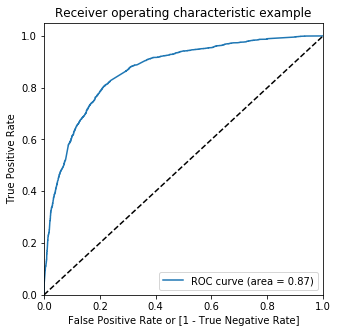

In [1415]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Prob)

In [1416]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Prob,LeadNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2912,1,0.621835,631712,1,1,1,1,1,1,1,1,0,0,0
4316,1,0.554525,618416,1,1,1,1,1,1,1,0,0,0,0
1812,1,0.798643,641905,1,1,1,1,1,1,1,1,1,0,0
7643,0,0.030149,591151,0,1,0,0,0,0,0,0,0,0,0
4456,0,0.397511,616910,0,1,1,1,1,0,0,0,0,0,0


In [1417]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380096  1.000000  0.000000
0.1   0.1  0.555377  0.975084  0.298032
0.2   0.2  0.727127  0.915118  0.611859
0.3   0.3  0.787640  0.823057  0.765924
0.4   0.4  0.793900  0.753801  0.818488
0.5   0.5  0.795666  0.668919  0.873382
0.6   0.6  0.786677  0.590372  0.907043
0.7   0.7  0.758427  0.447213  0.949249
0.8   0.8  0.733066  0.346284  0.970223
0.9   0.9  0.691653  0.210304  0.986794


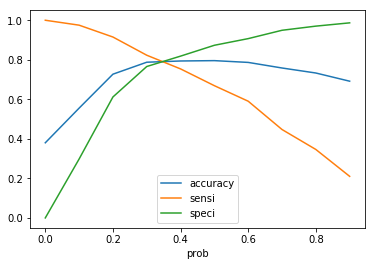

In [1418]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, around 0.35 is the optimum point to take it as a cutoff probability.

In [1419]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Prob,LeadNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
2912,1,0.621835,631712,1,1,1,1,1,1,1,1,0,0,0,1
4316,1,0.554525,618416,1,1,1,1,1,1,1,0,0,0,0,1
1812,1,0.798643,641905,1,1,1,1,1,1,1,1,1,0,0,1
7643,0,0.030149,591151,0,1,0,0,0,0,0,0,0,0,0,0
4456,0,0.397511,616910,0,1,1,1,1,0,0,0,0,0,0,1


In [1420]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.793900481540931

In [1421]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3055,  807],
       [ 477, 1891]], dtype=int64)

In [1422]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1423]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7985641891891891

In [1424]:
# Let us calculate specificity
TN / float(TN+FP)

0.7910409114448472

In [1425]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20895908855515277


In [1426]:
# Positive predictive value 
print (TP / float(TP+FP))

0.700889547813195


In [1427]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8649490373725934


### Make predictions on test set

In [1428]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Email Bounced,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website
5885,0,-0.857965,1,0,0,1,0,0,0,1,0,0,1,0,0
392,0,1.540200,0,1,0,0,0,0,0,0,0,1,0,0,0
2193,0,-0.857965,1,0,0,1,0,0,0,1,0,0,1,0,0
560,0,1.722528,1,0,0,1,0,0,0,0,0,1,0,0,0
5278,0,-0.857965,1,0,0,1,0,0,0,1,0,0,1,0,0


In [1429]:
X_test_sm = sm.add_constant(X_test)

In [1430]:
y_test_pred = res.predict(X_test_sm)

In [1431]:
y_test_pred[:10]

5885    0.067416
392     0.648546
2193    0.067416
560     0.891262
5278    0.067416
7864    0.079423
2819    0.408051
6831    0.108388
5144    0.150617
93      0.412777
dtype: float64

In [1432]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1433]:
# Let's see the head
y_pred_1.head()

,0
5885,0.067416
392,0.648546
2193,0.067416
560,0.891262
5278,0.067416


In [1434]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
5885,0
392,1
2193,0
560,1
5278,0


In [1435]:
# Putting CustID to index
y_test_df['LeadNumber'] = df_lead.loc[y_test_df.index]['Lead Number']
y_test_df.head()

,Converted,LeadNumber
5885,0,604797
392,1,656356
2193,0,638583
560,1,654471
5278,0,609314


In [1436]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1437]:
y_pred_1.head()

,0
0,0.067416
1,0.648546
2,0.067416
3,0.891262
4,0.067416


In [1438]:
y_test_df.head()

,Converted,LeadNumber
0,0,604797
1,1,656356
2,0,638583
3,1,654471
4,0,609314


In [1439]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1440]:
y_pred_final.head()

,Converted,LeadNumber,0
0,0,604797,0.067416
1,1,656356,0.648546
2,0,638583,0.067416
3,1,654471,0.891262
4,0,609314,0.067416


In [1441]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})

##### LEad probability for test dataset with lead number

In [1442]:
y_pred_final.head()

,Converted,LeadNumber,Lead_Prob
0,0,604797,0.067416
1,1,656356,0.648546
2,0,638583,0.067416
3,1,654471,0.891262
4,0,609314,0.067416


In [1443]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadNumber','Converted','Lead_Prob'], axis=1)

In [1444]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadNumber,Converted,Lead_Prob
0,604797,0,0.067416
1,656356,1,0.648546
2,638583,0,0.067416
3,654471,1,0.891262
4,609314,0,0.067416


In [1445]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [1446]:
y_pred_final.head()

,LeadNumber,Converted,Lead_Prob,final_predicted
0,604797,0,0.067416,0
1,656356,1,0.648546,1
2,638583,0,0.067416,0
3,654471,1,0.891262,1
4,609314,0,0.067416,0


In [1447]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8097378277153559

In [1448]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1433,  246],
       [ 262,  729]], dtype=int64)

In [1449]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1450]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7356205852674067

In [1451]:
# Let us calculate specificity
TN / float(TN+FP)

0.8534842167957117

### Train dataset Lead probabillity

In [1452]:
df_lead_train = y_train_pred_final[['LeadNumber','Lead_Prob']].set_index('LeadNumber')
df_lead_train.head()

,Lead_Prob
LeadNumber,
631712,0.621835
618416,0.554525
641905,0.798643
591151,0.030149
616910,0.397511


### Test dataset Lead probabillity

In [1453]:
df_lead_test = y_pred_final[['LeadNumber','Lead_Prob']].set_index('LeadNumber')
df_lead_test.head()

,Lead_Prob
LeadNumber,
604797,0.067416
656356,0.648546
638583,0.067416
654471,0.891262
609314,0.067416


### Append Train and Test dataset with Lead probabillity

In [1454]:
df_lead_score_final = pd.concat([df_lead_train,df_lead_test])
df_lead_score_final['Lead_score'] = df_lead_score_final['Lead_Prob'].apply(lambda x: round(x*100))
df_lead_score_final.head()

,Lead_Prob,Lead_score
LeadNumber,,
631712,0.621835,62
618416,0.554525,55
641905,0.798643,80
591151,0.030149,3
616910,0.397511,40


### Classifying the lead score as Hot, Cold, Medium

In [1455]:
bins =[0,40,70,100]
labels=['Cold','Medium','Hot']
df_lead_score_final['Lead_type'] = pd.cut(df_lead_score_final['Lead_score'], bins=bins, labels=labels)
df_lead_score_final.head()

,Lead_Prob,Lead_score,Lead_type
LeadNumber,,,
631712,0.621835,62,Medium
618416,0.554525,55,Medium
641905,0.798643,80,Hot
591151,0.030149,3,Cold
616910,0.397511,40,Cold


In [1457]:

df_lead_score_final['Lead_type'].value_counts()

Cold      5375
Hot       1781
Medium    1670
Name: Lead_type, dtype: int64